In [56]:
import networkx as nx
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
# def parse_pauli_string(pstring):
#     """
#     Parse a Pauli string like 'Z4X3Z1' into a dict: {qubit: operator}.
#     """
#     matches = re.findall(r'([IXYZ])(\d+)', pstring)
#     # print(matches)
    
#     # print('da')
#     #take all matches and convert them to a dict
#     # and add multiple operators to the same qubit if they appear multiple times
    
#     temp_dict = defaultdict(str)
#     for p, q in matches:
#         # if int(q) in temp_dict:
#             # If the qubit already has an operator, concatenate the new operator
#         temp_dict[int(q)] += p
#     # print(temp_dict)
#     return temp_dict
    

# def pauli_commutes(pauli1, pauli2):
#     """
#     Returns True if two Pauli operator strings (e.g., 'XZ' and 'Y') commute.
#     Handles multi-letter Pauli products by reducing them pairwise.
#     """
#     # We only need the parity of anticommuting pairs.
#     # Count how many pairs of (x, y) from pauli1 × pauli2 anticommute
#     anticomm = 0
#     for p1 in pauli1:
#         for p2 in pauli2:
#             if p1 == 'I' or p2 == 'I' or p1 == p2:
#                 continue
#             if sorted([p1, p2]) in [['X', 'Y'], ['X', 'Z'], ['Y', 'Z']]:
#                 anticomm += 1
#     return anticomm % 2 == 0

# def pauli_anticommutes(op1, op2):
#     """
#     Check if two Pauli strings anticommute.
#     Rule: Count the number of qubits where operators differ and both are not I and do not commute.
#     If that count is odd => anticommute.
#     """
#     qset = set(op1.keys()).union(op2.keys())
#     anticomm_count = 0
    
#     for q in qset:
#         p1 = op1.get(q, '')
#         p2 = op2.get(q, '')
#         if not p1 or not p2:
#             continue
        
#         if not pauli_commutes(p1, p2):
#             anticomm_count += 1
    
#     return anticomm_count % 2 == 1

# def pauli_commutation_graph(pauli_strings):
#     G = nx.Graph()
    
#     parsed_ops = [(s, parse_pauli_string(s)) for s in pauli_strings]
#     # print(parsed_ops)
    
#     for i, (label1, op1) in enumerate(parsed_ops):
#         G.add_node(label1)
#         for j in range(i+1, len(parsed_ops)):
#             label2, op2 = parsed_ops[j]
#             if pauli_anticommutes(op1, op2):
#                 G.add_edge(label1, label2)

#     return G


In [ ]:
    
# def multiply_single_paulis(p1, p2):
#     """
#     Multiply two single-qubit Pauli operators (I, X, Y, Z).
#     Returns (resulting operator, phase), where phase ∈ {1, -1, 1j, -1j}
#     """
#     if p1 == 'I': return p2, 1
#     if p2 == 'I': return p1, 1
#     if p1 == p2:  return 'I', 1

#     table = {
#         ('X', 'Y'): ('Z', 1j),
#         ('Y', 'X'): ('Z', -1j),
#         ('Y', 'Z'): ('X', 1j),
#         ('Z', 'Y'): ('X', -1j),
#         ('Z', 'X'): ('Y', 1j),
#         ('X', 'Z'): ('Y', -1j),
#     }
#     return table[(p1, p2)]

# def multiply_pauli_strings(pstring1, pstring2):
#     """
#     Multiply two Pauli strings like 'X0Z1' * 'Y0X1'
#     Returns (result_string, phase)
#     Example: 'X0Z1' * 'Y0X1' = ('Z0Z1', 1j)
#     """
#     import re
#     ops1 = re.findall(r'([IXYZ])(\d+)', pstring1)
#     ops2 = re.findall(r'([IXYZ])(\d+)', pstring2)

#     d1 = defaultdict(lambda: 'I', {int(q): p for p, q in ops1})
#     d2 = defaultdict(lambda: 'I', {int(q): p for p, q in ops2})

#     qubits = sorted(set(d1.keys()).union(d2.keys()))
#     result = {}
#     total_phase = 1

#     for q in qubits:
#         r, phase = multiply_single_paulis(d1[q], d2[q])
#         total_phase *= phase
#         if r != 'I':
#             result[q] = r

#     # Convert result dict to string, sorted by descending qubit index (or ascending if you prefer)
#     result_string = ''.join(f'{v}{k}' for k, v in sorted(result.items(), reverse=True))
#     return result_string if result_string else 'I', total_phase



# def apply_transformation_upon_commutation_graph(pauli_strings, fixed_operator):
#     new_pauli_strings = []
#     new_pauli_strings.append(fixed_operator)
#     for (i, op) in enumerate(pauli_strings):
#         if op != fixed_operator:
#             print(multiply_pauli_strings(op, fixed_operator))
            
            
#     # print(multiply_pauli_strings(pauli_strings[0], fixed_operator))
    

In [100]:
# # paulis = ['Z0', 'X0','Y0','X1X3','Z3','X4','Z4X3Z1']

# #full aniticomutate opearators
# paulis = ['X0', 'X1Z0', 'X2Z0Z1', 'X3Z0Z1Z2', 'Y0', 'Y1Z0', 'Y2Z0Z1', 'Y3Z0Z1Z2']
# # paulis = []
# G = pauli_commutation_graph(paulis)

# apply_transformation_upon_commutation_graph(paulis, 'X0')

# nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=100, font_size=20, font_color='black')
# plt.show()



In [121]:
def parse_pauli_string(pstring):
    """
    Parse a Pauli string like 'Z4X3Z1' into a dict: {qubit: [operators]}.
    Multiple operators on same qubit are kept in order.
    """
    matches = re.findall(r'([IXYZ])(\d+)', pstring)
    temp_dict = defaultdict(list)
    for p, q in matches:
        temp_dict[int(q)].append(p)
    return dict(temp_dict)

def multiply_single_paulis(p1, p2):
    if p1 == 'I': return p2, 1
    if p2 == 'I': return p1, 1
    if p1 == p2:  return 'I', 1

    table = {
        ('X', 'Y'): ('Z', 1j),
        ('Y', 'X'): ('Z', -1j),
        ('Y', 'Z'): ('X', 1j),
        ('Z', 'Y'): ('X', -1j),
        ('Z', 'X'): ('Y', 1j),
        ('X', 'Z'): ('Y', -1j),
    }
    return table[(p1, p2)]

def multiply_pauli_ops_list(ops):
    """
    Multiply a list of Pauli ops ['X', 'Y', 'Z'] in order.
    Returns (final_op, total_phase)
    """
    result = 'I'
    phase = 1
    for op in ops:
        result, p = multiply_single_paulis(result, op)
        phase *= p
    return result, phase

def pauli_commutes(oplist1, oplist2):
    """
    Check if two qubit-wise Pauli ops commute by computing their product phase.
    oplist1 and oplist2 are lists of Pauli ops per qubit (e.g., ['X'], ['Y', 'Z']).
    """
    phase1 = phase2 = 1
    result = {}

    qubits = set(oplist1.keys()).union(oplist2.keys())
    for q in qubits:
        ops1 = oplist1.get(q, [])
        ops2 = oplist2.get(q, [])
        _, p1 = multiply_pauli_ops_list(ops1 + ops2)
        _, p2 = multiply_pauli_ops_list(ops2 + ops1)
        phase1 *= p1
        phase2 *= p2

    return phase1 == phase2


def pauli_anticommutes(op1, op2):
    """
    Returns True iff op1 and op2 anticommute (i.e., their product has a -1 global phase).
    """
    phase1 = phase2 = 1
    qubits = set(op1.keys()).union(op2.keys())

    for q in qubits:
        ops1 = op1.get(q, [])
        ops2 = op2.get(q, [])
        _, p1 = multiply_pauli_ops_list(ops1 + ops2)
        _, p2 = multiply_pauli_ops_list(ops2 + ops1)
        phase1 *= p1
        phase2 *= p2

    return phase1 == -phase2

def pauli_commutation_graph(pauli_strings):
    G = nx.Graph()
    parsed_ops = [(s, parse_pauli_string(s)) for s in pauli_strings]

    for i, (label1, op1) in enumerate(parsed_ops):
        G.add_node(label1)
        for j in range(i + 1, len(parsed_ops)):
            label2, op2 = parsed_ops[j]
            if pauli_anticommutes(op1, op2):
                G.add_edge(label1, label2)
    return G


def format_pauli_string(op_dict):
    """
    Convert a Pauli operator dictionary back into string form, ordered by qubit.
    E.g., {0: ['Z'], 1: ['X']} → 'Z0X1'
    """
    items = []
    for q in sorted(op_dict.keys()):
        for op in op_dict[q]:
            items.append(f"{op}{q}")
    return ''.join(items)

def multiply_pauli_dicts(dict1, dict2):
    """
    Multiply two Pauli dictionaries (parsed from strings).
    Returns: (result_dict, total_phase)
    """
    result = defaultdict(list)
    total_phase = 1

    qubits = set(dict1.keys()).union(dict2.keys())

    for q in qubits:
        ops1 = dict1.get(q, [])
        ops2 = dict2.get(q, [])
        combined = ops1 + ops2
        op, phase = multiply_pauli_ops_list(combined)
        total_phase *= phase
        if op != 'I':
            result[q].append(op)

    return dict(result), total_phase

def apply_transformation_upon_commutation_graph(pauli_strings, fixed_operator):
    """
    Apply transformation (multiplication) of each Pauli string by the fixed operator.
    Return a list of transformed Pauli strings.
    """
    fixed_op_dict = parse_pauli_string(fixed_operator)
    transformed = [fixed_operator]  # include the fixed operator itself

    for op_str in pauli_strings:
        if op_str == fixed_operator:
            continue
        op_dict = parse_pauli_string(op_str)
        res_dict, phase = multiply_pauli_dicts(op_dict, fixed_op_dict)
        res_str = format_pauli_string(res_dict)
        if phase == -1:
            res_str = '-' + res_str  # track global phase if needed
        transformed.append(res_str)

    return transformed


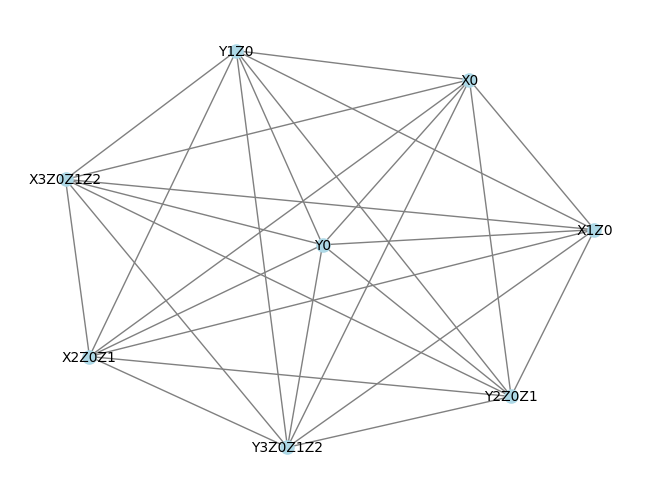

In [134]:
paulis = ['X0', 'X1Z0', 'X2Z0Z1', 'X3Z0Z1Z2', 'Y0', 'Y1Z0', 'Y2Z0Z1', 'Y3Z0Z1Z2']
# paulis = []
G = pauli_commutation_graph(paulis)
pos = nx.spring_layout(G, seed=42)
# print(G)

da = apply_transformation_upon_commutation_graph(paulis, 'X0')
G1 = pauli_commutation_graph(da)
pos1 = nx.spring_layout(G1, seed=42)

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=90, font_size=10, font_color='black')
plt.show()


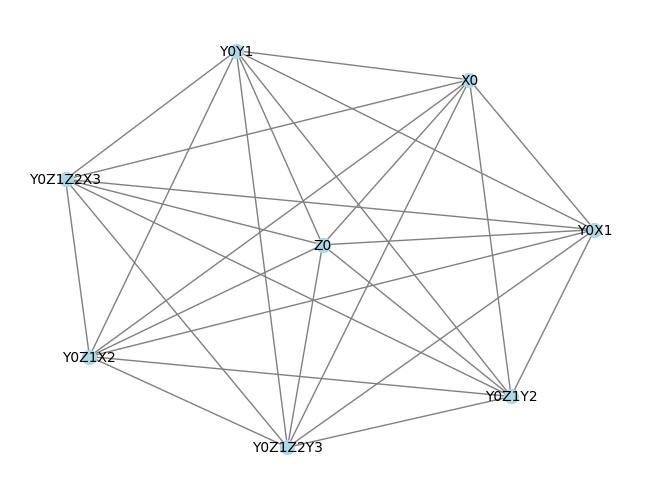

In [135]:
nx.draw(G1,pos1, with_labels=True, node_color='lightblue', edge_color='gray', node_size=100, font_size=10, font_color='black')
plt.show()